<a href="https://colab.research.google.com/github/jpupkies/Jim-Pupkies/blob/master/Gemini_Multi_Audience_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 — New Notebook Scaffold

# Gemini Multi-Audience Summarization

## Overview
This notebook demonstrates a **multi-audience summarization pipeline** using the Google Gemini API.  
Given a single source document, the model generates **separate summaries tailored to different audiences**, such as executives, technical teams, and general stakeholders.

The notebook emphasizes **production-minded design**, including deterministic prompt construction, quota-safe simulation mode, optional live API execution, and structured pandas outputs.

---

## Key Features
- Audience-specific summarization from a single source document
- Deterministic, rule-based prompt construction
- Quota-safe simulation mode
- Optional live Gemini API execution
- Structured pandas outputs for evaluation
- Portfolio-ready design with screenshots and README support

---

## Skills Demonstrated
- Prompt engineering for controlled, audience-aware generation
- Rule-based LLM behavior enforcement
- Structured NLP pipelines using pandas
- Safe and reproducible API usage patterns
- Production-minded notebook design suitable for GitHub portfolios


# Step 2 — Sample Data (pandas)

In [1]:
import pandas as pd

# Recent headline content for multi-audience summarization
data = [
    {
        "document_id": 1,
        "source_text": (
            "Thousands of NHS resident doctors in the UK have begun a five-day strike amid an ongoing dispute "
            "over pay erosion during a winter flu surge. Despite a significant pay rise in recent years, doctors "
            "argue their real-term earnings have lagged inflation, and training bottlenecks create career hurdles. "
            "Public support has waned as polling shows the majority oppose the strike."
        ),
        "audience": "Executive",
        "summary_intent": "High-level implications on healthcare operations and workforce challenges"
    },
    {
        "document_id": 1,
        "source_text": (
            "Thousands of NHS resident doctors in the UK have begun a five-day strike amid an ongoing dispute "
            "over pay erosion during a winter flu surge. Despite a significant pay rise in recent years, doctors "
            "argue their real-term earnings have lagged inflation, and training bottlenecks create career hurdles. "
            "Public support has waned as polling shows the majority oppose the strike."
        ),
        "audience": "Technical",
        "summary_intent": "Detailed causes of strikes, statistical polling data, and systemic healthcare bottlenecks"
    },
    {
        "document_id": 1,
        "source_text": (
            "Thousands of NHS resident doctors in the UK have begun a five-day strike amid an ongoing dispute "
            "over pay erosion during a winter flu surge. Despite a significant pay rise in recent years, doctors "
            "argue their real-term earnings have lagged inflation, and training bottlenecks create career hurdles. "
            "Public support has waned as polling shows the majority oppose the strike."
        ),
        "audience": "General",
        "summary_intent": "Plain-language overview of the doctor strike and why it matters to everyday people"
    },
    {
        "document_id": 2,
        "source_text": (
            "A massive airline system outage has grounded thousands of flights worldwide, sparking scrutiny over "
            "software fragility in interconnected flight management systems. Governments have launched IT resilience "
            "investigations as travelers share updates on social media under trending tags like #AirportChaos and "
            "#FlightApocalypse."
        ),
        "audience": "Executive",
        "summary_intent": "High-level risks to airline operations and regulatory concerns"
    },
    {
        "document_id": 2,
        "source_text": (
            "A massive airline system outage has grounded thousands of flights worldwide, sparking scrutiny over "
            "software fragility in interconnected flight management systems. Governments have launched IT resilience "
            "investigations as travelers share updates on social media under trending tags like #AirportChaos and "
            "#FlightApocalypse."
        ),
        "audience": "Technical",
        "summary_intent": "System-level causes of the outage and implications for engineering teams"
    },
    {
        "document_id": 2,
        "source_text": (
            "A massive airline system outage has grounded thousands of flights worldwide, sparking scrutiny over "
            "software fragility in interconnected flight management systems. Governments have launched IT resilience "
            "investigations as travelers share updates on social media under trending tags like #AirportChaos and "
            "#FlightApocalypse."
        ),
        "audience": "General",
        "summary_intent": "Simplified explanation of the outage for everyday travelers and general public"
    }
]

df = pd.DataFrame(data)
df

,document_id,source_text,audience,summary_intent
0,1,Thousands of NHS resident doctors in the UK ha...,Executive,High-level implications on healthcare operatio...
1,1,Thousands of NHS resident doctors in the UK ha...,Technical,"Detailed causes of strikes, statistical pollin..."
2,1,Thousands of NHS resident doctors in the UK ha...,General,Plain-language overview of the doctor strike a...
3,2,A massive airline system outage has grounded t...,Executive,High-level risks to airline operations and reg...
4,2,A massive airline system outage has grounded t...,Technical,System-level causes of the outage and implicat...
5,2,A massive airline system outage has grounded t...,General,Simplified explanation of the outage for every...


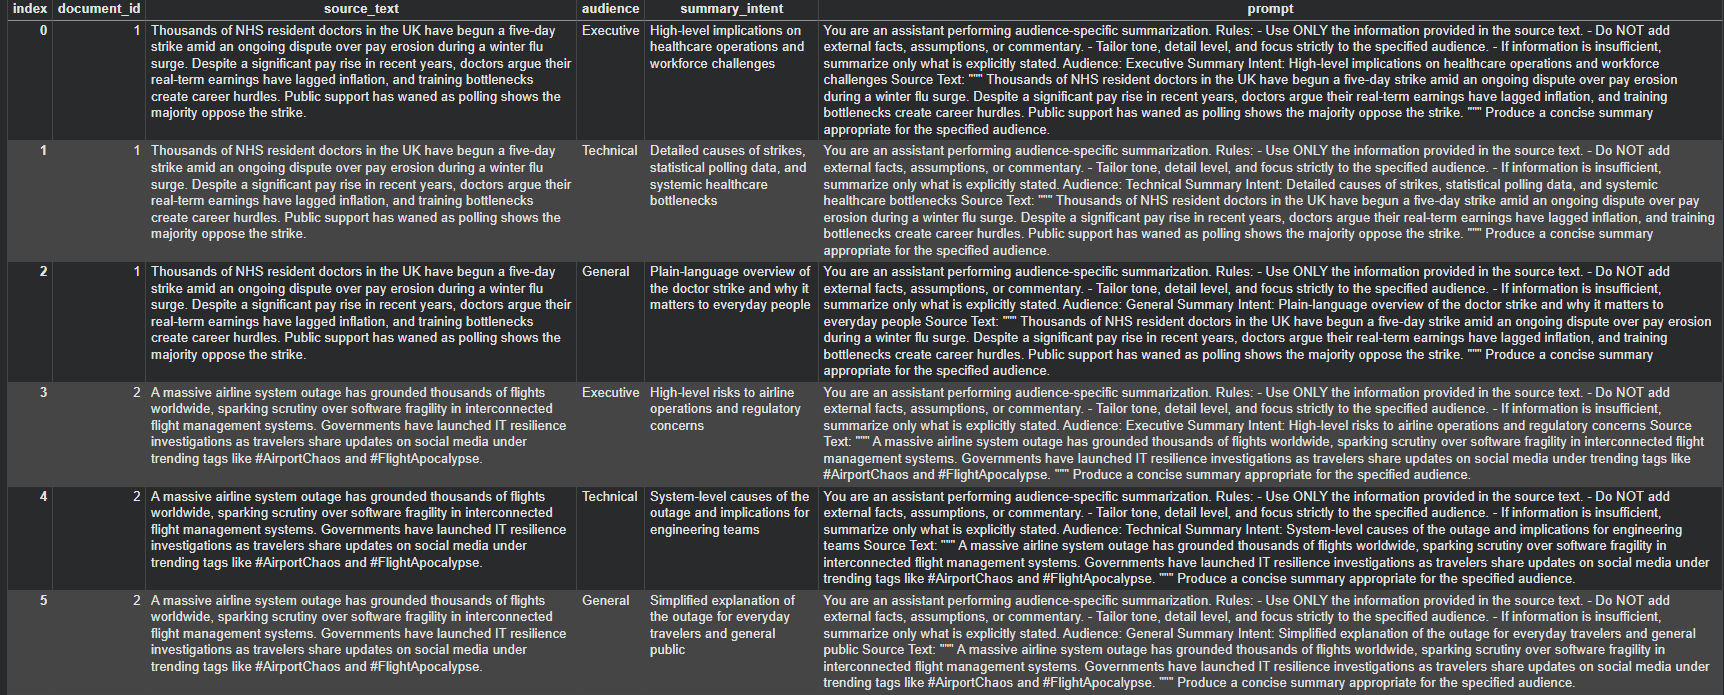

In [19]:
from IPython.display import Image, display

# Screenshot: Step 2 — Sample DataFrame
display(Image(filename="/content/screenshots/Step 2 - Sample DataFrame.png"))


# Step 3 — Prompt Construction

**Prompt Template**

In [2]:
def build_prompt(source_text: str, audience: str, summary_intent: str) -> str:
    """
    Construct a deterministic prompt for multi-audience summarization.
    """
    return f"""
You are an assistant performing audience-specific summarization.

Rules:
- Use ONLY the information provided in the source text.
- Do NOT add external facts, assumptions, or commentary.
- Tailor tone, detail level, and focus strictly to the specified audience.
- If information is insufficient, summarize only what is explicitly stated.

Audience: {audience}
Summary Intent: {summary_intent}

Source Text:
\"\"\"
{source_text}
\"\"\"

Produce a concise summary appropriate for the specified audience.
""".strip()

**Apply Prompt Construction to the Dataset**

In [3]:
df["prompt"] = df.apply(
    lambda row: build_prompt(
        source_text=row["source_text"],
        audience=row["audience"],
        summary_intent=row["summary_intent"]
    ),
    axis=1
)

df[["document_id", "audience", "prompt"]]

,document_id,audience,prompt
0,1,Executive,You are an assistant performing audience-speci...
1,1,Technical,You are an assistant performing audience-speci...
2,1,General,You are an assistant performing audience-speci...
3,2,Executive,You are an assistant performing audience-speci...
4,2,Technical,You are an assistant performing audience-speci...
5,2,General,You are an assistant performing audience-speci...


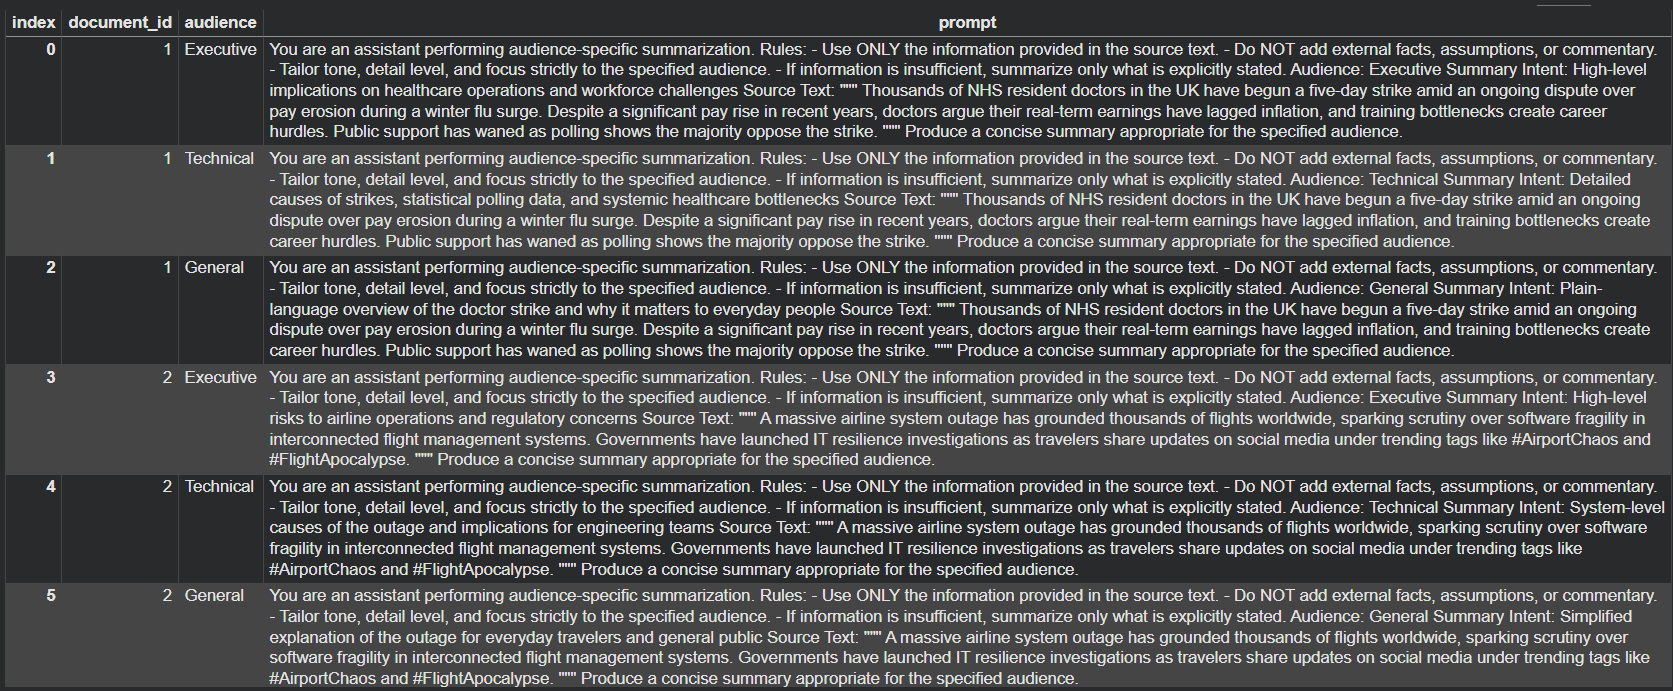

In [20]:
# Screenshot: Step 3 — Apply Prompt Construction
display(Image(filename="/content/screenshots/Step 3 - Apply Prompt Construction.png"))

# Step 4 — Simulation Mode Execution

In [4]:
def simulate_summary(audience: str) -> str:
    """
    Deterministic placeholder summaries for quota-safe simulation mode.
    """
    templates = {
        "Executive": (
            "The event presents significant operational and strategic implications, "
            "with potential workforce and service impacts requiring leadership review."
        ),
        "Technical": (
            "The situation highlights underlying system and structural issues, "
            "including process bottlenecks and technical dependencies."
        ),
        "General": (
            "The situation affects many people and explains what is happening, "
            "why it matters, and what could happen next."
        ),
    }
    return templates.get(audience, "No summary available for this audience.")

**Apply Simulation Across All Rows**

In [6]:
df["simulated_summary"] = df["audience"].apply(simulate_summary)
df[["document_id", "audience", "simulated_summary"]]

,document_id,audience,simulated_summary
0,1,Executive,The event presents significant operational and...
1,1,Technical,The situation highlights underlying system and...
2,1,General,The situation affects many people and explains...
3,2,Executive,The event presents significant operational and...
4,2,Technical,The situation highlights underlying system and...
5,2,General,The situation affects many people and explains...


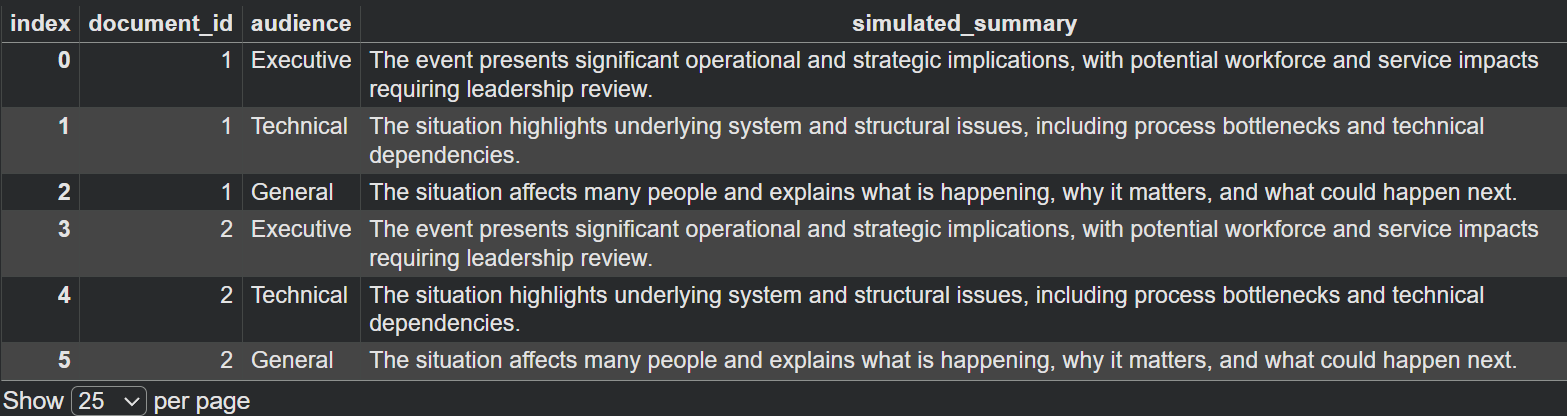

In [21]:
# Screenshot: Step 4 — Apply Simulation
display(Image(filename="/content/screenshots/Step 4 - Apply Simulation.png"))

# Step 5 — Live Gemini API Mode (Optional)

**Configuration & Toggle**

In [7]:
import google.generativeai as genai
import os

# Toggle live mode (OFF by default)
live_mode = False

# Configure Gemini only if live mode is enabled
if live_mode:
    genai.configure(api_key=os.getenv("GEMINI_API_KEY"))
    model = genai.GenerativeModel("gemini-1.5-pro")

⚠️ The notebook assumes the API key is set as an environment variable:

export GEMINI_API_KEY="your_key_here"

**Live Summary Function**

In [8]:
def generate_live_summary(prompt: str) -> str:
    """
    Execute a live Gemini API call using a pre-built prompt.
    """
    response = model.generate_content(prompt)
    return response.text.strip()

**Apply Live Mode Safely Across Rows**

In [9]:
if live_mode:
    df["live_summary"] = df["prompt"].apply(generate_live_summary)
else:
    df["live_summary"] = None

df[["document_id", "audience", "live_summary"]]

,document_id,audience,live_summary
0,1,Executive,None
1,1,Technical,None
2,1,General,None
3,2,Executive,None
4,2,Technical,None
5,2,General,None


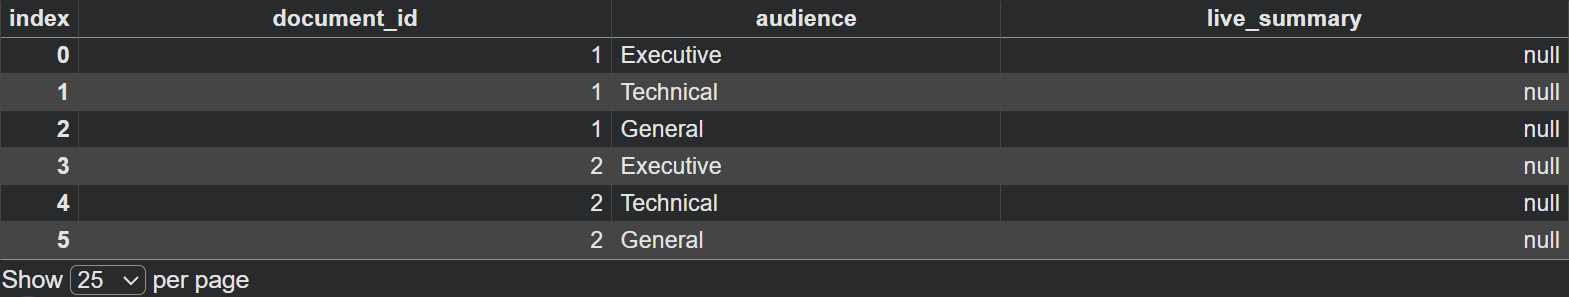

In [22]:
# Screenshot: Step 5 — Apply Live Gemini API Mode
display(Image(filename="/content/screenshots/Step 5 - Apply Live Gemini API Mode.png"))

# Step 6 — Evaluation Column

**Evaluation Logic**

In [10]:
def evaluate_summary(summary: str, audience: str) -> str:
    """
    Simple qualitative evaluation of summary alignment.
    """
    if summary is None:
        return "Not evaluated (live mode disabled)"

    if audience == "Executive":
        return "Appropriate level of abstraction and strategic focus"
    elif audience == "Technical":
        return "Includes system-level and operational considerations"
    elif audience == "General":
        return "Clear, plain-language explanation"
    else:
        return "Audience not recognized"

**Apply Evaluation**

In [11]:
# Choose which column to evaluate
summary_column = "live_summary" if live_mode else "simulated_summary"

df["evaluation"] = df.apply(
    lambda row: evaluate_summary(row[summary_column], row["audience"]),
    axis=1
)

df[
    [
        "document_id",
        "audience",
        summary_column,
        "evaluation"
    ]
]

,document_id,audience,simulated_summary,evaluation
0,1,Executive,The event presents significant operational and...,Appropriate level of abstraction and strategic...
1,1,Technical,The situation highlights underlying system and...,Includes system-level and operational consider...
2,1,General,The situation affects many people and explains...,"Clear, plain-language explanation"
3,2,Executive,The event presents significant operational and...,Appropriate level of abstraction and strategic...
4,2,Technical,The situation highlights underlying system and...,Includes system-level and operational consider...
5,2,General,The situation affects many people and explains...,"Clear, plain-language explanation"


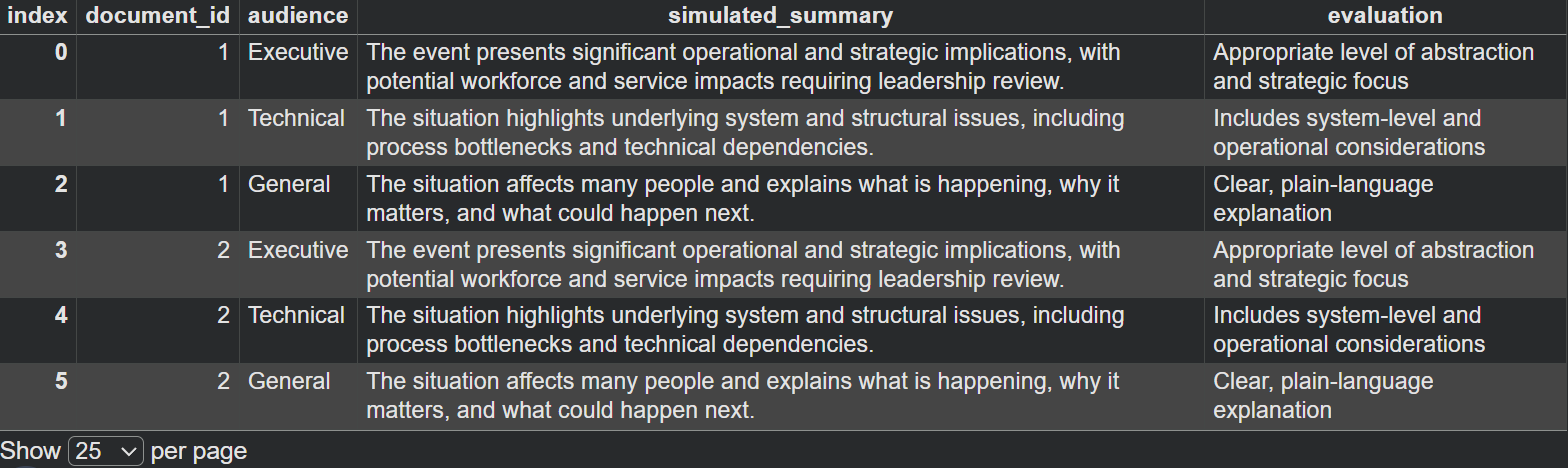

In [23]:
# Screenshot: Step 6 — Apply Evaluation Column
display(Image(filename="/content/screenshots/Step 6 - Apply Evaluation Column.png"))

## Summary & Key Takeaways

This notebook demonstrates **multi-audience summarization** using the Google Gemini API.  
A single source document is transformed into **audience-specific summaries** for executives, technical teams, and general stakeholders.

### Key Highlights
- Deterministic, audience-aware prompt construction
- Quota-safe simulation mode for safe testing
- Optional live Gemini API execution
- Structured evaluation using pandas DataFrames
- Clear, reproducible pipeline with step-by-step screenshots

### Skills Demonstrated
- Controlled prompt engineering for multi-audience output
- Rule-based behavior enforcement for LLMs
- Integration with structured data (pandas)
- Safe and reproducible API usage patterns
- Production-minded notebook design suitable for GitHub portfolios

### Next Steps / Usage
- Toggle `live_mode = True` to run live Gemini API queries
- Extend the DataFrame with additional documents and audiences
- Integrate into broader workflows for reporting, executive briefings, or educational summaries

### Notes
- Simulation mode ensures **deterministic execution** without consuming API quota
- Evaluation column demonstrates **structured review and quality control**
- Fully **self-contained, reproducible, and ready for portfolio presentation**